# üîé –ê–Ω–∞–ª–∏–∑ –∏ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏—Ö —Ä–µ—à–µ–Ω–∏–π üí¨

–û–¥–Ω–∏–º –∏–∑ –≥–ª–∞–≤–Ω—ã—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ —Ö–æ–¥–µ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è —Å–ø–µ—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∞–≥–µ–Ω—Ç–∞ —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –≤—ã–±–æ—Ä —è–∑—ã–∫–æ–≤–æ–π –º–æ–¥–µ–ª–∏.

–í –∫–∞—á–µ—Å—Ç–≤–µ –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–≤ –±—ã–ª–∏ –≤—ã–±—Ä–∞–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –∏–∑–≤–µ—Å—Ç–Ω—ã–µ —è–∑—ã–∫–æ–≤—ã–µ –º–æ–¥–µ–ª–∏:
  - Mistral
  - BLOOM
  - OPT
  - T5
  - Falcon

In [1]:
!pip install transformers torch -qU
!pip install openai -qU
!pip install rouge -qU

In [ ]:
import openai
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# –î–∞–Ω–Ω—ã–µ
q_list = [
    '1. –ö–∞–∫–æ–≤—ã –æ—Å–Ω–æ–≤–Ω—ã–µ –æ—Ç–ª–∏—á–∏—è –º–µ–∂–¥—É –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–º –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç–æ–º –∏ –º–∞—à–∏–Ω–Ω—ã–º –æ–±—É—á–µ–Ω–∏–µ–º?',
    '2. –ö–∞–∫–∏–µ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏ —É —É–¥–∞–ª–µ–Ω–Ω–æ–π —Ä–∞–±–æ—Ç—ã?',
    '3. –ú–æ–∂–µ—à—å —Ä–∞—Å—Å–∫–∞–∑–∞—Ç—å –æ –∑–Ω–∞—á–µ–Ω–∏–∏ –∏ —Å–∏–º–≤–æ–ª–∏–∫–µ —Ü–≤–µ—Ç–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –∫—É–ª—å—Ç—É—Ä–∞—Ö?',
    '4. –ö–∞–∫–æ–≤—ã –æ—Å–Ω–æ–≤–Ω—ã–µ —ç—Ç–∞–ø—ã —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–æ–≥—Ä–∞–º–º–Ω–æ–≥–æ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è?',
    '5. –ö–∞–∫–∏–µ —Å–æ–≤–µ—Ç—ã —Ç—ã –º–æ–∂–µ—à—å –¥–∞—Ç—å –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –Ω–∞–≤—ã–∫–æ–≤ –ø—É–±–ª–∏—á–Ω—ã—Ö –≤—ã—Å—Ç—É–ø–ª–µ–Ω–∏–π?'
]

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–ø—Ä–æ—Å–∞ –∫ GPT-4
def ask_gpt4(questions):
    try:
        responses = []
        for question in questions:
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "user", "content": question}
                ]
            )
            answer = response['choices'][0]['message']['content']
            responses.append(answer)
        return responses
    except Exception as e:
        return f"–ü—Ä–æ–∏–∑–æ—à–ª–∞ –æ—à–∏–±–∫–∞ –ø—Ä–∏ –∑–∞–ø—Ä–æ—Å–µ –∫ GPT-4: {e}"

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–ø—Ä–æ—Å–∞ –∫ –¥—Ä—É–≥–æ–π –º–æ–¥–µ–ª–∏
def ask_other_model(questions):
    try:
        tokenizer = AutoTokenizer.from_pretrained("IlyaGusev/gemma-2-2b-it-abliterated")
        model = AutoModelForCausalLM.from_pretrained("IlyaGusev/gemma-2-2b-it-abliterated")

        responses = []
        for question in questions:
            inputs = tokenizer.encode(question, return_tensors='pt')
            outputs = model.generate(inputs, max_length=150)
            answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
            responses.append(answer)
        return responses
    except Exception as e:
        return f"–ü—Ä–æ–∏–∑–æ—à–ª–∞ –æ—à–∏–±–∫–∞ –ø—Ä–∏ –∑–∞–ø—Ä–æ—Å–µ –∫ –¥—Ä—É–≥–æ–π –º–æ–¥–µ–ª–∏: {e}"

# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è
gpt4_answers = ask_gpt4(q_list)
other_model_answers = ask_other_model(q_list)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
for i, question in enumerate(q_list):
    print(f"–í–æ–ø—Ä–æ—Å: {question}")
    print(f"–û—Ç–≤–µ—Ç GPT-4: {gpt4_answers[i]}")
    print(f"–û—Ç–≤–µ—Ç –¥—Ä—É–≥–æ–π –º–æ–¥–µ–ª–∏: {other_model_answers[i]}")
    print("\n")

In [3]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-1.5B-Instruct") # 8 –º–∏–Ω—É—Ç –æ–±—Ä–∞–±–æ—Ç–∫–∏
model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-1.5B-Instruct")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

In [4]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("IlyaGusev/gemma-2-2b-it-abliterated") # 10 –º–∏–Ω—É—Ç –æ–±—Ä–∞–±–æ—Ç–∫–∏
model = AutoModelForCausalLM.from_pretrained("IlyaGusev/gemma-2-2b-it-abliterated")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/46.9k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

# ü¶æ –ö–æ–¥ –≤—ã–ø–æ–ª–Ω—è–µ—Ç –æ—Ü–µ–Ω–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤, —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏ (GPT, Qwen –∏ Gemma), –ø–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º –º–µ—Ç—Ä–∏–∫–∞–º, —Ç–∞–∫–∏–º –∫–∞–∫ BLEU, ROUGE-L, BERTScore, Precision, Recall –∏ MRR.

## ‚úçÔ∏è –í–æ—Ç –∫—Ä–∞—Ç–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ –∫–∞–∂–¥–æ–π –∏–∑ –º–µ—Ç—Ä–∏–∫:

1. *MRR (Mean Reciprocal Rank)*
–û–ø–∏—Å–∞–Ω–∏–µ: MRR –∏–∑–º–µ—Ä—è–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ —Å–∏—Å—Ç–µ–º, –∫–æ—Ç–æ—Ä—ã–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç —Å–ø–∏—Å–æ–∫ –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞ –∑–∞–ø—Ä–æ—Å. –û–Ω —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –∫–∞–∫ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ–±—Ä–∞—Ç–Ω—ã—Ö —Ä–∞–Ω–≥–æ–≤ –ø–µ—Ä–≤–æ–≥–æ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω–æ–≥–æ –æ—Ç–≤–µ—Ç–∞ –¥–ª—è –≤—Å–µ—Ö –∑–∞–ø—Ä–æ—Å–æ–≤. –ß–µ–º –≤—ã—à–µ MRR, —Ç–µ–º –ª—É—á—à–µ —Å–∏—Å—Ç–µ–º–∞.

2. *BLEU (Bilingual Evaluation Understudy)*
–û–ø–∏—Å–∞–Ω–∏–µ: BLEU ‚Äî —ç—Ç–æ –º–µ—Ç—Ä–∏–∫–∞, –∏—Å–ø–æ–ª—å–∑—É–µ–º–∞—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞—à–∏–Ω–Ω–æ–≥–æ –ø–µ—Ä–µ–≤–æ–¥–∞. –û–Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∞ –Ω–∞ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–∏ n-–≥—Ä–∞–º–º –º–µ–∂–¥—É —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º —Ç–µ–∫—Å—Ç–æ–º –∏ —ç—Ç–∞–ª–æ–Ω–Ω—ã–º. BLEU-—Å–∫–æ—Ä –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 0 –¥–æ 1, –≥–¥–µ 1 –æ–∑–Ω–∞—á–∞–µ—Ç –ø–æ–ª–Ω–æ–µ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ.

3. *ROUGE (Recall-Oriented Understudy for Gisting Evaluation)*
–û–ø–∏—Å–∞–Ω–∏–µ: ROUGE ‚Äî —ç—Ç–æ –Ω–∞–±–æ—Ä –º–µ—Ç—Ä–∏–∫, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ —Å—É–º–º–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –ø–µ—Ä–µ–≤–æ–¥–∞. –û–Ω –≤–∫–ª—é—á–∞–µ—Ç –≤ —Å–µ–±—è Precision, Recall –∏ F1-–º–µ—Ä—É, –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–µ –Ω–∞ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–∏ n-–≥—Ä–∞–º–º –º–µ–∂–¥—É —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –∏ —ç—Ç–∞–ª–æ–Ω–Ω—ã–º —Ç–µ–∫—Å—Ç–∞–º–∏.

4. *BERTScore*
–û–ø–∏—Å–∞–Ω–∏–µ: BERTScore –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å BERT –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–æ–π —Å—Ö–æ–∂–µ—Å—Ç–∏ –º–µ–∂–¥—É —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –∏ —ç—Ç–∞–ª–æ–Ω–Ω—ã–º —Ç–µ–∫—Å—Ç–∞–º–∏. –û–Ω –æ—Å–Ω–æ–≤—ã–≤–∞–µ—Ç—Å—è –Ω–∞ –∫–æ—Å–∏–Ω—É—Å–Ω–æ–º —Å—Ö–æ–¥—Å—Ç–≤–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ —Å–ª–æ–≤ –∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –±–æ–ª–µ–µ –≥–ª—É–±–æ–∫—É—é –æ—Ü–µ–Ω–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ —Ç–µ–∫—Å—Ç–∞, —á–µ–º –ø—Ä–æ—Å—Ç—ã–µ –Ω-–≥—Ä–∞–º–º–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏.

5. *Precision –∏ Recall*
–û–ø–∏—Å–∞–Ω–∏–µ: Precision –∏–∑–º–µ—Ä—è–µ—Ç –¥–æ–ª—é –∏—Å—Ç–∏–Ω–Ω–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö (TP / (TP + FP)), —Ç–æ–≥–¥–∞ –∫–∞–∫ Recall –∏–∑–º–µ—Ä—è–µ—Ç –¥–æ–ª—é –∏—Å—Ç–∏–Ω–Ω–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö –∏—Å—Ç–∏–Ω–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö (TP / (TP + FN)). –≠—Ç–∏ –º–µ—Ç—Ä–∏–∫–∏ —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –≤ –∑–∞–¥–∞—á–∞—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –ø–æ–∏—Å–∫–∞ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π.

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

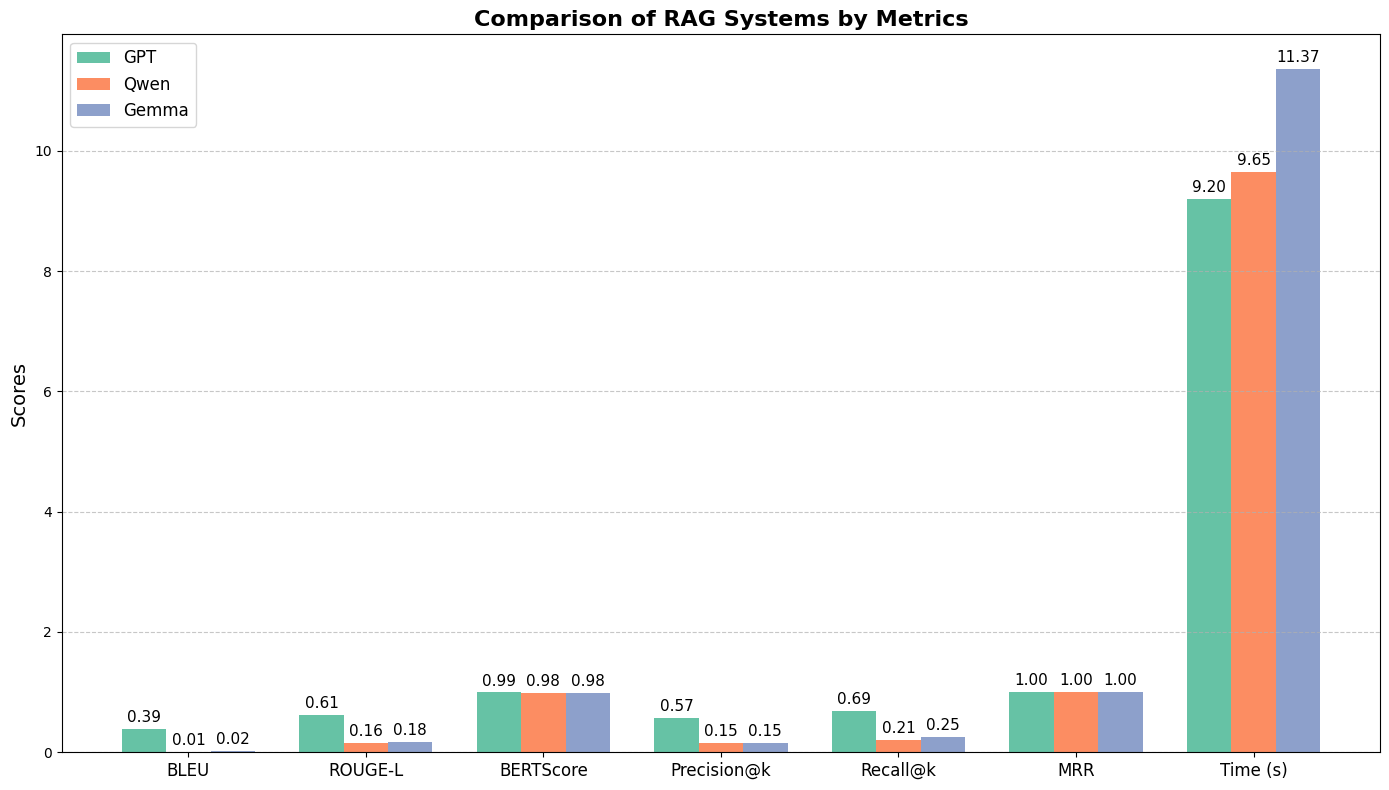

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import AutoTokenizer, BertModel
import torch
import time

true_answers = [
    "1. –û—Å–Ω–æ–≤–Ω—ã–µ –æ—Ç–ª–∏—á–∏—è –º–µ–∂–¥—É –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–º –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç–æ–º –∏ –º–∞—à–∏–Ω–Ω—ã–º –æ–±—É—á–µ–Ω–∏–µ–º: –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç (–ò–ò) ‚Äî —ç—Ç–æ —à–∏—Ä–æ–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –æ—Ö–≤–∞—Ç—ã–≤–∞—é—â–∞—è –ª—é–±—ã–µ —Å–∏—Å—Ç–µ–º—ã, –∏–º–∏—Ç–∏—Ä—É—é—â–∏–µ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –º–∞—à–∏–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ ‚Äî —ç—Ç–æ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ –ò–ò, —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω–Ω–æ–µ –Ω–∞ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–µ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞–¥–∞—á.",
    "2. –ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏ —É–¥–∞–ª–µ–Ω–Ω–æ–π —Ä–∞–±–æ—Ç—ã: –ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –≤–∫–ª—é—á–∞—é—Ç –≥–∏–±–∫–æ—Å—Ç—å –≥—Ä–∞—Ñ–∏–∫–∞ –∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ commuting, —á—Ç–æ –º–æ–∂–µ—Ç –ø–æ–≤—ã—Å–∏—Ç—å –ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω–æ—Å—Ç—å. –ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏ –º–æ–≥—É—Ç –≤–∫–ª—é—á–∞—Ç—å –∏–∑–æ–ª—è—Ü–∏—é –∏ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –≤ –∫–æ–º–∞–Ω–¥–Ω–æ–º –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–∏.",
    "3. –ó–Ω–∞—á–µ–Ω–∏–µ –∏ —Å–∏–º–≤–æ–ª–∏–∫–∞ —Ü–≤–µ—Ç–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –∫—É–ª—å—Ç—É—Ä–∞—Ö: –¶–≤–µ—Ç–∞ –º–æ–≥—É—Ç –∏–º–µ—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Ä–∞–∑–Ω—ã—Ö –∫—É–ª—å—Ç—É—Ä–∞—Ö: –Ω–∞–ø—Ä–∏–º–µ—Ä, –±–µ–ª—ã–π —Ü–≤–µ—Ç —Å–∏–º–≤–æ–ª–∏–∑–∏—Ä—É–µ—Ç —á–∏—Å—Ç–æ—Ç—É –∏ –º–∏—Ä –≤ –∑–∞–ø–∞–¥–Ω–æ–π –∫—É–ª—å—Ç—É—Ä–µ, –Ω–æ –º–æ–∂–µ—Ç –∞—Å—Å–æ—Ü–∏–∏—Ä–æ–≤–∞—Ç—å—Å—è —Å–æ —Å–∫–æ—Ä–±—å—é –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –≤–æ—Å—Ç–æ—á–Ω—ã—Ö –∫—É–ª—å—Ç—É—Ä–∞—Ö. –ö—Ä–∞—Å–Ω—ã–π —Ü–≤–µ—Ç —á–∞—Å—Ç–æ –∞—Å—Å–æ—Ü–∏–∏—Ä—É–µ—Ç—Å—è —Å –ª—é–±–æ–≤—å—é –∏ —Å—Ç—Ä–∞—Å—Ç—å—é, –Ω–æ —Ç–∞–∫–∂–µ –º–æ–∂–µ—Ç —Å–∏–º–≤–æ–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –æ–ø–∞—Å–Ω–æ—Å—Ç—å.",
    "4. –û—Å–Ω–æ–≤–Ω—ã–µ —ç—Ç–∞–ø—ã —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–æ–≥—Ä–∞–º–º–Ω–æ–≥–æ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è: –û—Å–Ω–æ–≤–Ω—ã–µ —ç—Ç–∞–ø—ã –≤–∫–ª—é—á–∞—é—Ç —Å–±–æ—Ä —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–π, –ø—Ä–æ–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ, –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ, —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ —Ä–∞–∑–≤–µ—Ä—Ç—ã–≤–∞–Ω–∏–µ. –ö–∞–∂–¥—ã–π —ç—Ç–∞–ø –≤–∞–∂–µ–Ω –¥–ª—è –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –∏ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –∫–æ–Ω–µ—á–Ω–æ–≥–æ –ø—Ä–æ–¥—É–∫—Ç–∞.",
    "5. –°–æ–≤–µ—Ç—ã –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –Ω–∞–≤—ã–∫–æ–≤ –ø—É–±–ª–∏—á–Ω—ã—Ö –≤—ã—Å—Ç—É–ø–ª–µ–Ω–∏–π: –ü—Ä–∞–∫—Ç–∏–∫—É–π—Ç–µ—Å—å —Ä–µ–≥—É–ª—è—Ä–Ω–æ –∏ –∑–∞–ø–∏—Å—ã–≤–∞–π—Ç–µ —Å–µ–±—è, —á—Ç–æ–±—ã —É–≤–∏–¥–µ—Ç—å –æ–±–ª–∞—Å—Ç–∏ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è. –¢–∞–∫–∂–µ —Å—Ç–∞—Ä–∞–π—Ç–µ—Å—å –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–æ–≤–∞—Ç—å —Å –∞—É–¥–∏—Ç–æ—Ä–∏–µ–π, –∑–∞–¥–∞–≤–∞—è –≤–æ–ø—Ä–æ—Å—ã –∏ –∏—Å–ø–æ–ª—å–∑—É—è –≤–∏–∑—É–∞–ª—å–Ω—ã–µ –º–∞—Ç–µ—Ä–∏–∞–ª—ã –¥–ª—è –ø–æ–¥–¥–µ—Ä–∂–∞–Ω–∏—è –∏–Ω—Ç–µ—Ä–µ—Å–∞."
]

# –ó–¥–µ—Å—å –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –æ—Ç–≤–µ—Ç—ã –æ—Ç –º–æ–¥–µ–ª–µ–π
gpt_responses = [
    '''1. –û—Å–Ω–æ–≤–Ω—ã–µ –æ—Ç–ª–∏—á–∏—è –º–µ–∂–¥—É –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–º –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç–æ–º –∏ –º–∞—à–∏–Ω–Ω—ã–º –æ–±—É—á–µ–Ω–∏–µ–º: –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç (–ò–ò) ‚Äî —ç—Ç–æ —à–∏—Ä–æ–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –æ—Ö–≤–∞—Ç—ã–≤–∞—é—â–∞—è —Å–æ–∑–¥–∞–Ω–∏–µ —Å–∏—Å—Ç–µ–º, —Å–ø–æ—Å–æ–±–Ω—ã—Ö –≤—ã–ø–æ–ª–Ω—è—Ç—å –∑–∞–¥–∞—á–∏,
    —Ç—Ä–µ–±—É—é—â–∏–µ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–≥–æ –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç–∞, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –º–∞—à–∏–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ (–ú–û) —è–≤–ª—è–µ—Ç—Å—è –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ–º –ò–ò, —Ñ–æ–∫—É—Å–∏—Ä—É—é—â–∏–º—Å—è –Ω–∞
    –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–µ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∞–Ω–Ω—ã—Ö. –ú–û –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –∞–ª–≥–æ—Ä–∏—Ç–º—ã –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö –∏ —É–ª—É—á—à–µ–Ω–∏—è —Å–≤–æ–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –±–µ–∑ —è–≤–Ω–æ–≥–æ –ø—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–∞ –∫–∞–∂–¥–æ–º —ç—Ç–∞–ø–µ.''',
    '''2. –ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ —É–¥–∞–ª–µ–Ω–Ω–æ–π —Ä–∞–±–æ—Ç—ã –≤–∫–ª—é—á–∞—é—Ç –≥–∏–±–∫–æ—Å—Ç—å –≤ —Ä–∞—Å–ø–∏—Å–∞–Ω–∏–∏ –∏ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Ä–∞–±–æ—Ç–∞—Ç—å –∏–∑ –ª—é–±–æ–≥–æ –º–µ—Å—Ç–∞,
    —á—Ç–æ –º–æ–∂–µ—Ç –ø–æ–≤—ã—Å–∏—Ç—å –ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω–æ—Å—Ç—å. –û–¥–Ω–∞–∫–æ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏ –º–æ–≥—É—Ç –≤–∫–ª—é—á–∞—Ç—å –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ª–∏—á–Ω–æ–≥–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è —Å –∫–æ–ª–ª–µ–≥–∞–º–∏ –∏ —Ç—Ä—É–¥–Ω–æ—Å—Ç–∏ –≤
    –ø–æ–¥–¥–µ—Ä–∂–∞–Ω–∏–∏ –≥—Ä–∞–Ω–∏—Ü –º–µ–∂–¥—É —Ä–∞–±–æ—Ç–æ–π –∏ –ª–∏—á–Ω–æ–π –∂–∏–∑–Ω—å—é.''',
    '''3. –ó–Ω–∞—á–µ–Ω–∏–µ –∏ —Å–∏–º–≤–æ–ª–∏–∫–∞ —Ü–≤–µ—Ç–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –∫—É–ª—å—Ç—É—Ä–∞—Ö: –¶–≤–µ—Ç–∞ –º–æ–≥—É—Ç –∏–º–µ—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Ä–∞–∑–Ω—ã—Ö –∫—É–ª—å—Ç—É—Ä–∞—Ö: –Ω–∞–ø—Ä–∏–º–µ—Ä, –±–µ–ª—ã–π —Ü–≤–µ—Ç —Å–∏–º–≤–æ–ª–∏–∑–∏—Ä—É–µ—Ç —á–∏—Å—Ç–æ—Ç—É –∏ –º–∏—Ä –≤ –∑–∞–ø–∞–¥–Ω–æ–π –∫—É–ª—å—Ç—É—Ä–µ, –Ω–æ –º–æ–∂–µ—Ç –∞—Å—Å–æ—Ü–∏–∏—Ä–æ–≤–∞—Ç—å—Å—è —Å–æ —Å–∫–æ—Ä–±—å—é –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –≤–æ—Å—Ç–æ—á–Ω—ã—Ö –∫—É–ª—å—Ç—É—Ä–∞—Ö. –ö—Ä–∞—Å–Ω—ã–π —Ü–≤–µ—Ç —á–∞—Å—Ç–æ –∞—Å—Å–æ—Ü–∏–∏—Ä—É–µ—Ç—Å—è —Å –ª—é–±–æ–≤—å—é –∏ —Å—Ç—Ä–∞—Å—Ç—å—é, –Ω–æ —Ç–∞–∫–∂–µ –º–æ–∂–µ—Ç —Å–∏–º–≤–æ–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –æ–ø–∞—Å–Ω–æ—Å—Ç—å.''',
    '''4. –û—Å–Ω–æ–≤–Ω—ã–µ —ç—Ç–∞–ø—ã —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–æ–≥—Ä–∞–º–º–Ω–æ–≥–æ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è –≤–∫–ª—é—á–∞—é—Ç –∞–Ω–∞–ª–∏–∑ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–π, –ø—Ä–æ–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã,
    –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ, —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ —Ä–∞–∑–≤–µ—Ä—Ç—ã–≤–∞–Ω–∏–µ. –ü–æ—Å–ª–µ —ç—Ç–æ–≥–æ —Å–ª–µ–¥—É–µ—Ç —ç—Ç–∞–ø –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –∏ –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è, —á—Ç–æ–±—ã –æ–±–µ—Å–ø–µ—á–∏—Ç—å –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—É—é —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å –∏
    —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –∏–∑–º–µ–Ω—è—é—â–∏–º—Å—è —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.''',
    '''5. –°–æ–≤–µ—Ç—ã –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –Ω–∞–≤—ã–∫–æ–≤ –ø—É–±–ª–∏—á–Ω—ã—Ö –≤—ã—Å—Ç—É–ø–ª–µ–Ω–∏–π: –î–ª—è —É–ª—É—á—à–µ–Ω–∏—è –Ω–∞–≤—ã–∫–æ–≤ –ø—É–±–ª–∏—á–Ω—ã—Ö –≤—ã—Å—Ç—É–ø–ª–µ–Ω–∏–π –≤–∞–∂–Ω–æ —Ä–µ–≥—É–ª—è—Ä–Ω–æ –ø—Ä–∞–∫—Ç–∏–∫–æ–≤–∞—Ç—å—Å—è –∏ –ø–æ–ª—É—á–∞—Ç—å –æ–±—Ä–∞—Ç–Ω—É—é —Å–≤—è–∑—å, —á—Ç–æ–±—ã –≤—ã—è–≤–∏—Ç—å –æ–±–ª–∞—Å—Ç–∏ –¥–ª—è
    —É–ª—É—á—à–µ–Ω–∏—è. –¢–∞–∫–∂–µ —Å—Ç–æ–∏—Ç –∏–∑—É—á–∏—Ç—å —Ç–µ—Ö–Ω–∏–∫–∏ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Å—Ç—Ä–µ—Å—Å–æ–º –∏ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏, —á—Ç–æ–±—ã —á—É–≤—Å—Ç–≤–æ–≤–∞—Ç—å —Å–µ–±—è –∫–æ–º—Ñ–æ—Ä—Ç–Ω–µ–µ –ø–µ—Ä–µ–¥ –∞—É–¥–∏—Ç–æ—Ä–∏–µ–π.'''
]

qwen_responses = [
    '''1. –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç (AI) –∏ –º–∞—à–∏–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ - —ç—Ç–æ –¥–≤–∞ —Ä–∞–∑–Ω—ã—Ö –∞—Å–ø–µ–∫—Ç–∞, –Ω–æ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∞–Ω–Ω—ã—Ö. –û—Å–Ω–æ–≤–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è:
    –ú–∞—à–∏–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ - —ç—Ç–æ –ø—Ä–æ—Ü–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è –∫–æ–º–ø—å—é—Ç–µ—Ä—É, –∫–æ–≥–¥–∞ –æ–Ω –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç –¥–∞–Ω–Ω—ã–µ –∏ learns patterns –∏–ª–∏ –ø—Ä–∞–≤–∏–ª–∞, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –¥–ª—è –ø—Ä–∏–Ω—è—Ç–∏—è —Ä–µ—à–µ–Ω–∏–π.''',
    '''2. –†–∞–±–æ—Ç–∞ —É–¥–∞–ª–µ–Ω–Ω–æ ‚Äî —ç—Ç–æ –Ω–µ –Ω–æ–≤–∞—è —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è, –Ω–æ –≤—Å–µ —Ä–∞–≤–Ω–æ –µ–µ –º–Ω–æ–≥–∏–µ —Å—á–∏—Ç–∞—é—Ç –Ω–æ–≤–æ–π —Ñ–æ—Ä–º–æ–π –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ –±–∏–∑–Ω–µ—Å–∞. –ò —Ö–æ—Ç—è —ç—Ç–æ –º–æ–∂–µ—Ç –ø–æ–∫–∞–∑–∞—Ç—å—Å—è –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –Ω–µ–ø–æ–Ω—è—Ç–Ω—ã–º, –µ—Å–ª–∏ –≤—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ –Ω–∞ —É–¥–∞–ª–µ–Ω–Ω—ã—Ö —É—Å–ª–æ–≤–∏—è—Ö, —Ç–æ –≤–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–π –ø–æ–¥—Ö–æ–¥ –∫ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ —Ä–∞–±–æ—á–µ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞.
–°—É—â–µ—Å—Ç–≤—É–µ—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è —ç—Ç–æ–π –ø—Ä–æ–±–ª–µ–º—ã: –æ—Ç –æ–±—ã—á–Ω–æ–≥–æ –æ—Ñ–∏—Å–∞ –¥–æ –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏–ª–∏ —Å—Ç—É–¥–∏–∏. –í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≤–∞—à–∏—Ö –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–π –∏ –ø–æ—Ç—Ä–µ–±–Ω–æ—Å—Ç–µ–π''',
    '''3. –î–∞, –∫–æ–Ω–µ—á–Ω–æ! –¶–≤–µ—Ç—ã –∏–≥—Ä–∞—é—Ç –≤–∞–∂–Ω—É—é —Ä–æ–ª—å –∫–∞–∫ —Å–∏–º–≤–æ–ª–∏—á–µ—Å–∫–∏–µ —ç–ª–µ–º–µ–Ω—Ç—ã –≤ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∫—É–ª—å—Ç—É—Ä–Ω—ã—Ö —Å–∏—Å—Ç–µ–º–∞—Ö. –í–æ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–º–µ—Ä–æ–≤:
**–ö–∏—Ç–∞–π**:
   - –ö—Ä–∞—Å–Ω—ã–π: –ó–Ω–∞—á–∏—Ç —Å—á–∞—Å—Ç—å–µ, –±–æ–≥–∞—Ç—Å—Ç–≤–æ –∏ —É—Å–ø–µ—Ö.
   - –ë–µ–ª—ã–π: –û–±–æ–∑–Ω–∞—á–∞–µ—Ç —á–∏—Å—Ç–æ—Ç—É, purity (—á–∏—Å—Ç–æ—Ç–∞) –∏ –¥–æ–±—Ä–æ—Ç—É.
**–ò–Ω–¥–∏—è**:
   - –°–∏–Ω–∏–π: –û–±—Ä–∞–∑—É–µ—Ç "–±–ª–∏–∑–æ—Å—Ç—å" –∏–ª–∏ "–∫–æ–Ω—Ç–∞–∫—Ç".
   - –ñ—ë–ª—Ç—ã–π: –°–∏–º–≤–æ–ª–∏–∑–∏—Ä—É–µ—Ç''',
    '''4. –í–æ–ø—Ä–æ—Å –∫–∞—Å–∞–µ—Ç—Å—è —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –ø—Ä–æ—Ü–µ—Å—Å–∞ —Å–æ–∑–¥–∞–Ω–∏—è –ø—Ä–æ–≥—Ä–∞–º–º–Ω–æ–≥–æ –ø—Ä–æ–¥—É–∫—Ç–∞.
–û—Å–Ω–æ–≤–Ω—ã–µ —ç—Ç–∞–ø—ã —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–æ–≥—Ä–∞–º–º–Ω–æ–≥–æ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è –æ–±—ã—á–Ω–æ –≤–∫–ª—é—á–∞—é—Ç —Å–ª–µ–¥—É—é—â–∏–µ —à–∞–≥–∏:
**–ü–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –∞–Ω–∞–ª–∏–∑ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–π**: –≠—Ç–æ—Ç —ç—Ç–∞–ø –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å —Å–±–æ—Ä–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –ø–æ—Ç—Ä–µ–±–Ω–æ—Å—Ç—è—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, –∞ —Ç–∞–∫–∂–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω—ã—Ö –∏ –Ω–µ—Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω—ã—Ö —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–π. –≠—Ç–æ –º–æ–∂–µ—Ç –≤–∫–ª—é—á–∞—Ç—å –æ–±—Å—É–∂–¥–µ–Ω–∏–µ –∫–æ–Ω—Ü–µ–ø—Ü–∏–∏ –ø—Ä–æ–µ–∫—Ç–∞ –∏ —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ –ø–æ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è–º.
**–ü—Ä–æ–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ**: –ó–¥–µ—Å—å –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Å–æ–∑–¥–∞–Ω–∏–µ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –º–æ–¥–µ–ª–∏ —Å–∏—Å—Ç–µ–º—ã.''',
    '''5. –ù–∞—á–∏–Ω–∞–π—Ç–µ —Å –º–∞–ª–æ–≥–æ –∏ –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–π—Ç–µ —Å–ª–æ–∂–Ω–æ—Å—Ç—å.
–ü—Ä–∞–∫—Ç–∏–∫—É–π—Ç–µ—Å—å —Ä–µ–≥—É–ª—è—Ä–Ω–æ, –Ω–µ –±–æ–π—Ç–µ—Å—å –æ—à–∏–±–æ–∫.
–ò–∑—É—á–∏—Ç–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—É –≤—ã—Å—Ç—É–ø–ª–µ–Ω–∏—è, –Ω–∞–ø—Ä–∏–º–µ—Ä, 5-4-1 –∏–ª–∏ 3-3-1.
–£–ø—Ä–∞–∂–Ω—è–π—Ç–µ —Ä–µ—á–µ–≤—ã–µ –¥–≤–∏–∂–µ–Ω–∏—è: —à–µ–≤–µ–ª–µ–Ω–∏–µ —è–∑—ã–∫–æ–º, –ø–æ–¥—ä–µ–º –≥—É–±.
–ó–∞–Ω–∏–º–∞–π—Ç–µ—Å—å —Ñ–∏–∑–∏—á–µ—Å–∫–∏–º–∏ —É–ø—Ä–∞–∂–Ω–µ–Ω–∏—è–º–∏, —á—Ç–æ–±—ã —É–ª—É—á—à–∏—Ç—å'''
]

gemma_responses = [
    '''1. –ò—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç (–ò–ò)** - —ç—Ç–æ –æ–±—à–∏—Ä–Ω–æ–µ –ø–æ–Ω—è—Ç–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –≤–∫–ª—é—á–∞–µ—Ç –≤ —Å–µ–±—è —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç—É–∞–ª—å–Ω—ã—Ö —Å–∏—Å—Ç–µ–º –≤—ã–ø–æ–ª–Ω—è—Ç—å –∑–∞–¥–∞—á–∏,
    –∫–æ—Ç–æ—Ä—ã–µ –æ–±—ã—á–Ω–æ —Ç—Ä–µ–±—É—é—Ç —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–≥–æ –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç–∞. –≠—Ç–æ –≤–∫–ª—é—á–∞–µ—Ç –≤ —Å–µ–±—è –ø–æ–Ω–∏–º–∞–Ω–∏–µ, –º—ã—à–ª–µ–Ω–∏–µ, –æ–±—É—á–µ–Ω–∏–µ, —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º –∏ –ø—Ä–∏–Ω—è—Ç–∏–µ —Ä–µ—à–µ–Ω–∏–π. ''',
    '''2. **–ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞:**
* **–ì–∏–±–∫–æ—Å—Ç—å:** –£–¥–∞–ª–µ–Ω–Ω–∞—è —Ä–∞–±–æ—Ç–∞ –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º —É—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å —Å–≤–æ–π –≥—Ä–∞—Ñ–∏–∫ –∏ —Ä–∞–±–æ—Ç–∞—Ç—å –≤ —É–¥–æ–±–Ω–æ–µ –≤—Ä–µ–º—è.
* **–ü–æ–≤—ã—à–µ–Ω–Ω–∞—è –ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω–æ—Å—Ç—å:** –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –≤ –ø–æ–µ–∑–¥–∫–∞—Ö –∏ –æ—Ñ–∏—Å–Ω—ã—Ö –±—É–¥–Ω—è—Ö –º–æ–∂–µ—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –±–æ–ª–µ–µ –ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω–æ–π —Ä–∞–±–æ—Ç–µ.
* **–£–≤–µ–ª–∏—á–µ–Ω–∏–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–µ–π:** –£–¥–∞–ª–µ–Ω–Ω–∞—è —Ä–∞–±–æ—Ç–∞ –æ—Ç–∫—Ä—ã–≤–∞–µ—Ç –¥–æ—Å—Ç—É–ø –∫ –±–æ–ª–µ–µ —à–∏—Ä–æ–∫–æ–º—É —Å–ø–µ–∫—Ç—Ä—É –≤–∞–∫–∞–Ω—Å–∏–π, –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞—è—Å—å –ª–æ–∫–∞—Ü–∏—è–º–∏.
* **–°–æ–∫—Ä–∞—â–µ–Ω–∏–µ —Ä–∞—Å—Ö–æ–¥–æ–≤:** –£–¥–∞–ª–µ–Ω–Ω–∞—è —Ä–∞–±–æ—Ç–∞ –º–æ–∂–µ—Ç —Å–Ω–∏–∑–∏—Ç—å —Ä–∞—Å—Ö–æ–¥—ã –Ω–∞ –¥–æ—Ä–æ–≥—É, –ø–∏—Ç–∞–Ω–∏–µ –∏ –¥—Ä—É–≥–∏–µ –æ—Ñ–∏—Å–Ω—ã–µ —Ä–∞—Å—Ö–æ–¥—ã.
* **–ü–æ–≤—ã—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ –∂–∏–∑–Ω–∏:** –£–¥–∞–ª–µ–Ω–Ω–∞—è —Ä–∞–±–æ—Ç–∞ –º–æ–∂–µ—Ç –ø–æ–∑–≤–æ–ª–∏—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º –±–æ–ª—å—à–µ''',
    '''3. –ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ –∏–∑—É—á–∞—Ç—å —Å–∏–º–≤–æ–ª–∏–∫—É —Ü–≤–µ—Ç–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –∫—É–ª—å—Ç—É—Ä–∞—Ö! –í–æ—Ç –∫—Ä–∞—Ç–∫–∏–π –æ–±–∑–æ—Ä –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –æ–±—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –∏—Ö –∫—É–ª—å—Ç—É—Ä–Ω–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏:
**–û–±—â–∞—è —Å–∏–º–≤–æ–ª–∏–∫–∞:**
* ** –õ—é–±–æ–≤—å:** –ö—Ä–∞—Å–Ω—ã–µ —Ä–æ–∑—ã –ø–æ–≤—Å–µ–º–µ—Å—Ç–Ω–æ –∞—Å—Å–æ—Ü–∏–∏—Ä—É—é—Ç—Å—è —Å —Ä–æ–º–∞–Ω—Ç–∏—á–µ—Å–∫–æ–π –ª—é–±–æ–≤—å—é, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –±–µ–ª—ã–µ —Ä–æ–∑—ã —Å–∏–º–≤–æ–ª–∏–∑–∏—Ä—É—é—Ç —á–∏—Å—Ç–æ—Ç—É –∏ –Ω–µ–≤–∏–Ω–Ω–æ—Å—Ç—å.
* ** –î—Ä—É–∂–±–∞: ** –¢—é–ª—å–ø–∞–Ω—ã, –º–∞—Ä–≥–∞—Ä–∏—Ç–∫–∏ –∏ –ø–æ–¥—Å–æ–ª–Ω—É—Ö–∏ —á–∞—Å—Ç–æ –¥–∞—Ä—è—Ç –≤ –∑–Ω–∞–∫ –¥—Ä—É–∂–±—ã.
* ** –°—á–∞—Å—Ç—å–µ:** –ü–æ–¥—Å–æ–ª–Ω—É—Ö–∏, –º–∞—Ä–≥–∞—Ä–∏—Ç–∫–∏ –∏ –ª–∏–ª–∏–∏ –∞—Å—Å–æ—Ü–∏–∏—Ä—É—é—Ç—Å—è —Å —Ä–∞–¥–æ—Å—Ç—å—é –∏ –ø–æ–∑–∏—Ç–∏–≤–æ–º.
* ** –ú–∏—Ä:** –ë–µ–ª—ã–µ –ª–∏–ª–∏–∏, –ª–∞–≤–∞–Ω–¥–∞ –∏ –∫–æ–ª–æ–∫–æ–ª—å—á–∏–∫–∏ —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –¥–ª—è –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏—è –º–∏—Ä–∞ –∏ —É–º–∏—Ä–æ—Ç–≤–æ—Ä–µ–Ω–∏—è.''',
    '''4. **–û—Å–Ω–æ–≤–Ω—ã–µ —ç—Ç–∞–ø—ã —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–æ–≥—Ä–∞–º–º–Ω–æ–≥–æ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è:**
1. **–†–∞–∑—Ä–∞–±–æ—Ç–∫–∞ –∏–¥–µ–∏ –∏ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ:** –≠—Ç–∞–ø—ã –≤–∫–ª—é—á–∞—é—Ç –≤ —Å–µ–±—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –∞—É–¥–∏—Ç–æ—Ä–∏–∏, –∞–Ω–∞–ª–∏–∑ —Ä—ã–Ω–∫–∞, –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞ –∏ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏—Ö —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–π, –≤—ã–±–æ—Ä –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –∏ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏.
2. **–ü—Ä–æ–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ:** –°–æ–∑–¥–∞–Ω–∏–µ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è, —Å–ø–µ—Ü–∏—Ñ–∏–∫–∞—Ü–∏–∏, –¥–∏–∞–≥—Ä–∞–º–º –∏ –¥—Ä—É–≥–∏—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤, –æ–ø–∏—Å—ã–≤–∞—é—â–∏—Ö —Å—Ç—Ä—É–∫—Ç—É—Ä—É, —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å –∏ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è –∫ –ø—Ä–æ–≥—Ä–∞–º–º–Ω–æ–º—É –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—é.
3. **–†–∞–∑—Ä–∞–±–æ—Ç–∫–∞ –∫–æ–¥–∞:** –ù–∞–ø–∏—Å–∞–Ω–∏–µ –∫–æ–¥–∞ –ø—Ä–æ–≥—Ä–∞–º–º–Ω–æ–≥–æ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è, —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –æ—Ç–ª–∞–¥–∫–∞ –∫–æ–¥–∞.''',
    '''5. ## –°–æ–≤–µ—Ç—ã –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –Ω–∞–≤—ã–∫–æ–≤ –ø—É–±–ª–∏—á–Ω—ã—Ö –≤—ã—Å—Ç—É–ø–ª–µ–Ω–∏–π:
**–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞:**
* **–û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ —Ü–µ–ª—å:** –ß—Ç–æ –≤—ã —Ö–æ—Ç–∏—Ç–µ –¥–æ—Å—Ç–∏—á—å —Å –ø–æ–º–æ—â—å—é –≤–∞—à–µ–≥–æ –≤—ã—Å—Ç—É–ø–ª–µ–Ω–∏—è?
* **–°–æ—Å—Ç–∞–≤—å—Ç–µ –ø–ª–∞–Ω:** –†–∞–∑–¥–µ–ª–∏—Ç–µ —Å–≤–æ—é –∏–¥–µ—é –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —á–∞—Å—Ç–µ–π –∏ —Å–æ–∑–¥–∞–π—Ç–µ –ª–æ–≥–∏—á–Ω—ã–π –ø–ª–∞–Ω.
* **–ò–∑—É—á–∏—Ç–µ –∞—É–¥–∏—Ç–æ—Ä–∏—é:**  –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –∏—Ö –∏–Ω—Ç–µ—Ä–µ—Å—ã, —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞–Ω–∏–π –∏ –æ–∂–∏–¥–∞–Ω–∏—è.
* **–ü—Ä–æ–¥—É–º–∞–π—Ç–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—É:** –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ç–æ–¥—ã, —Ç–∞–∫–∏–µ –∫–∞–∫ "STAR" (Situation, Task, Action, Result), —á—Ç–æ–±—ã —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.'''
]

# –ú–µ—Ç—Ä–∏–∫–∏
rouge = Rouge()

def compute_bleu(reference, response):
    return sentence_bleu([reference.split()], response.split())

def compute_rouge(reference, response):
    scores = rouge.get_scores(response, reference)
    return scores[0]["rouge-l"]["f"]

# Load the BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Ensure the model is in evaluation mode
model.eval()

def compute_bert_score(reference, response):
    with torch.no_grad():
        ref_tokens = tokenizer(reference, return_tensors="pt", padding=True, truncation=True)
        resp_tokens = tokenizer(response, return_tensors="pt", padding=True, truncation=True)

        # Get the hidden states
        ref_emb = model(**ref_tokens).last_hidden_state.mean(dim=1)
        resp_emb = model(**resp_tokens).last_hidden_state.mean(dim=1)

        # Calculate cosine similarity
        score = torch.nn.functional.cosine_similarity(ref_emb, resp_emb).item()
    return score

def compute_precision_recall(true_docs, predicted_docs):
    precision = []
    recall = []
    for true, pred in zip(true_docs, predicted_docs):
        true_set = set(true.split())
        pred_set = set(pred.split())
        precision.append(len(true_set & pred_set) / len(pred_set) if pred_set else 0)
        recall.append(len(true_set & pred_set) / len(true_set))
    return np.mean(precision), np.mean(recall)

def compute_mrr(true_docs, predicted_docs):
    mrr = []
    for true, pred in zip(true_docs, predicted_docs):
        ranks = [i + 1 for i, doc in enumerate(pred) if doc in true]
        mrr.append(1 / min(ranks) if ranks else 0)
    return np.mean(mrr)

# –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫
metrics = {
    "BLEU": [],
    "ROUGE-L": [],
    "BERTScore": [],
    "Precision@k": [],
    "Recall@k": [],
    "MRR": [],
    "Time (s)": []
}

responses_list = [gpt_responses, qwen_responses, gemma_responses]  # –°–ø–∏—Å–æ–∫ –æ—Ç–≤–µ—Ç–æ–≤ –æ—Ç —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å–∏—Å—Ç–µ–º

for responses in responses_list:
    start_time = time.time()

    bleu_scores = [compute_bleu(true, resp) for true, resp in zip(true_answers, responses)]
    rouge_scores = [compute_rouge(true, resp) for true, resp in zip(true_answers, responses)]
    bert_scores = [compute_bert_score(true, resp) for true, resp in zip(true_answers, responses)]
    precision, recall = compute_precision_recall(true_answers, responses)
    mrr = compute_mrr(true_answers, responses)

    elapsed_time = time.time() - start_time

    metrics["BLEU"].append(np.mean(bleu_scores))
    metrics["ROUGE-L"].append(np.mean(rouge_scores))
    metrics["BERTScore"].append(np.mean(bert_scores))
    metrics["Precision@k"].append(precision)
    metrics["Recall@k"].append(recall)
    metrics["MRR"].append(mrr)
    metrics["Time (s)"].append(elapsed_time)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
systems = ["GPT", "Qwen", "Gemma"]
x = np.arange(len(metrics))  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–µ—Ç—Ä–∏–∫
width = 0.25  # –®–∏—Ä–∏–Ω–∞ —Å—Ç–æ–ª–±—Ü–æ–≤

fig, ax = plt.subplots(figsize=(14, 8))
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
for i, system in enumerate(systems):
    ax.bar(x + (i - 1) * width, [metrics[metric][i] for metric in metrics], width, label=system, color=colors[i])

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –≥—Ä–∞—Ñ–∏–∫–∞
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Comparison of RAG Systems by Metrics', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics.keys(), fontsize=12)
ax.legend(fontsize=12)

# –ü–æ–¥–ø–∏—Å–∏ –∫ —Å—Ç–æ–ª–±—Ü–∞–º –∏ –≤—ã–¥–µ–ª–µ–Ω–∏–µ –ª–∏–¥–µ—Ä–æ–≤
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points", ha='center', fontsize=11)

for i in range(len(systems)):
    add_labels(ax.patches[i*len(metrics):(i+1)*len(metrics)])

# –ö—Ä–∞—Å–∏–≤—ã–π —Å—Ç–∏–ª—å
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()